##  **Auto Machine Learning with Auto-Sklearn library**




In [ ]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip3 install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0   2296      0 --:--:-- --:--:-- --:--:--  2296


In [ ]:
!pip3 install auto-sklearn

In [ ]:
!sudo apt-get install build-essential swig python3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
python3-dev is already the newest version (3.6.7-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import sklearn
sklearn.__version__

'0.24.2'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from autosklearn.classification import AutoSklearnClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import string 
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
DataSet0 = pd.read_excel('/content/drive/MyDrive/Maestría en Ingeniería/Machine Learning/Proyecto Final/Descripcion.xlsx')
DataSet0.shape

(13606, 9)

In [ ]:
DataSet0.head()

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1460,Presentacion Moodle,1.053860e+09,No definido,NaN,NaN,NaN,SIGMA Ingeniería S.A,SIGMA
1,TIK1005,Revision Presentacion Aliado de Negocio JEEP,2.434445e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
2,TIK1006,Se debe realizar la configuración de los servi...,1.607954e+07,Creación de servicios / publicación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
3,TIK1015,Análisis Calidad y verificaciones.,1.058818e+09,No definido,NaN,NaN,NR,Codensa,Geolumina
4,TIK7096,Capa predial Cartagena,2.434355e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA


In [ ]:
PorBorrar1 = DataSet0[DataSet0['descripcion'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
# PorBorrar1 = DataSet0[DataSet0['nombre_cliente'].isnull()].index
# DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
# PorBorrar1 = DataSet0[DataSet0['Linea_Negocio'].isnull()].index
# DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)


PorBorrar1 = DataSet0[DataSet0['categoria'] == '1- Nuevo requerimiento'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'] == 'No definido'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)

In [ ]:
DataSet0['descripcion'] = DataSet0['descripcion'].str.lower()
DataSet0

,descripcion,categoria,nombre_cliente,Linea_Negocio
0,se debe realizar la configuración de los servi...,Creación de servicios / publicación de servicios,Cartagueña de Aseo Total ESP,Geoaseo
1,crear servicios geoserver,Creación de servicios / publicación de servicios,Llanogas,Geolumina
2,crear servicios geoserver,Creación de servicios / publicación de servicios,Llanogas,Geolumina
3,"construcción, mantenimiento y migración de la ...",Informes de reporte y mantenimiento,SIGMA Ingeniería S.A,SIGMA
4,publicación servicio geoserver,Creación de servicios / publicación de servicios,Llanogas,Geolumina
...,...,...,...,...
8314,"cordial saludo, adjunto la carga de tickets de...","Carga de datos masiva, gestión de tickets",Veolia (antiguo Grupo Sala),Geoaseo
8315,"por favor actualizar las capas de macros, micr...",Informes de reporte y mantenimiento,Veolia (antiguo Grupo Sala),Geoaseo
8316,modificar perfil de rioaseo,"Cambiar datos por BD, Cambiar estado de OT",Rio Aseo Total ESP,Geoaseo
8317,creación de un usuario de consulta para la con...,Creación / inactivación de usuario,CAR Magdalena,Geoambiental


In [ ]:
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"á", "a")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"é", "e")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"í", "i")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ó", "o")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ú", "u")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ñ", "n")
DataSet0

,descripcion,categoria,nombre_cliente,Linea_Negocio
0,se debe realizar la configuracion de los servi...,Creación de servicios / publicación de servicios,Cartagueña de Aseo Total ESP,Geoaseo
1,crear servicios geoserver,Creación de servicios / publicación de servicios,Llanogas,Geolumina
2,crear servicios geoserver,Creación de servicios / publicación de servicios,Llanogas,Geolumina
3,"construccion, mantenimiento y migracion de la ...",Informes de reporte y mantenimiento,SIGMA Ingeniería S.A,SIGMA
4,publicacion servicio geoserver,Creación de servicios / publicación de servicios,Llanogas,Geolumina
...,...,...,...,...
8314,"cordial saludo, adjunto la carga de tickets de...","Carga de datos masiva, gestión de tickets",Veolia (antiguo Grupo Sala),Geoaseo
8315,"por favor actualizar las capas de macros, micr...",Informes de reporte y mantenimiento,Veolia (antiguo Grupo Sala),Geoaseo
8316,modificar perfil de rioaseo,"Cambiar datos por BD, Cambiar estado de OT",Rio Aseo Total ESP,Geoaseo
8317,creacion de un usuario de consulta para la con...,Creación / inactivación de usuario,CAR Magdalena,Geoambiental


In [ ]:
punct = string.punctuation
for c in punct:
    DataSet0['descripcion'] = DataSet0['descripcion'].replace(c, " ")
# print(DataSet0['descripcion'] )
DataSet0

,descripcion,categoria,nombre_cliente,Linea_Negocio
0,se debe realizar la configuracion de los servi...,Creación de servicios / publicación de servicios,Cartagueña de Aseo Total ESP,Geoaseo
1,crear servicios geoserver,Creación de servicios / publicación de servicios,Llanogas,Geolumina
2,crear servicios geoserver,Creación de servicios / publicación de servicios,Llanogas,Geolumina
3,"construccion, mantenimiento y migracion de la ...",Informes de reporte y mantenimiento,SIGMA Ingeniería S.A,SIGMA
4,publicacion servicio geoserver,Creación de servicios / publicación de servicios,Llanogas,Geolumina
...,...,...,...,...
8314,"cordial saludo, adjunto la carga de tickets de...","Carga de datos masiva, gestión de tickets",Veolia (antiguo Grupo Sala),Geoaseo
8315,"por favor actualizar las capas de macros, micr...",Informes de reporte y mantenimiento,Veolia (antiguo Grupo Sala),Geoaseo
8316,modificar perfil de rioaseo,"Cambiar datos por BD, Cambiar estado de OT",Rio Aseo Total ESP,Geoaseo
8317,creacion de un usuario de consulta para la con...,Creación / inactivación de usuario,CAR Magdalena,Geoambiental


In [ ]:
patterns_labels = ['Configuración GPS',
                    'Revisión de formularios',
                    'Auditoria del sistema / interrupción completa de servicio',
                    'Informes de reporte y mantenimiento',
                    'Configuración de visor',
                    'Creación / inactivación  de usuario',
                    'Datos erróneos en reporte / actualización de reportes',
                    'Disminución de desempeño de plataforma',
                    'Carga de datos masiva, gestión de tickets',
                    'No envia el backup de app móvil / no cargan datos en app',
                    'Cambiar datos por BD, Cambiar estado de OT',
                    'Capacitación de módulo o funcionalidad',
                    'Creación de servicios / publicación de servicios' ]

                  
           
patterns_colors = ['lawngreen', 'tab:orange', 'tab:purple', 'tab:olive' , 'tab:brown' , 'tab:gray',
                  'tab:pink' ,'r', 'g', 'b', 'c' , 'm' , 'y'] # 'k' , '#6E2C00']


correct_Pattern_labels = DataSet0['categoria'].values

DataSet0 = DataSet0.drop(['tik_codigo','propietario', 'modulo', 'producto', 'ans'], axis=1)

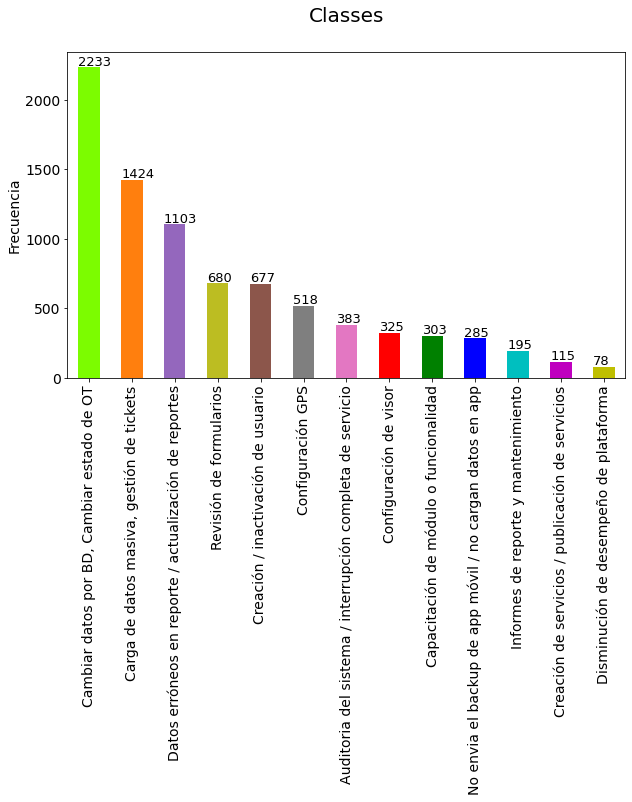

In [ ]:
# class distribution
ax = DataSet0['categoria'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=14, color=patterns_colors)
# ax = DataSet['Classes'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 15, str(round(i.get_height(), 5)), fontsize=13)

In [ ]:
# class distribution
print('DataSet category distrubution: \n')
print(DataSet0.groupby('categoria').size())

DataSet category distrubution: 

categoria
Auditoria del sistema / interrupción completa de servicio     383
Cambiar datos por BD, Cambiar estado de OT                   2233
Capacitación de módulo o funcionalidad                        303
Carga de datos masiva, gestión de tickets                    1424
Configuración GPS                                             518
Configuración de visor                                        325
Creación / inactivación de usuario                            677
Creación de servicios / publicación de servicios              115
Datos erróneos en reporte / actualización de reportes        1103
Disminución de desempeño de plataforma                         78
Informes de reporte y mantenimiento                           195
No envia el backup de app móvil / no cargan datos en app      285
Revisión de formularios                                       680
dtype: int64


In [ ]:
X = DataSet0['descripcion']
y = DataSet0['categoria']

X

0       se debe realizar la configuracion de los servi...
1                              crear servicios geoserver 
2                              crear servicios geoserver 
3       construccion, mantenimiento y migracion de la ...
4                          publicacion servicio geoserver
                              ...                        
8314    cordial saludo, adjunto la carga de tickets de...
8315    por favor actualizar las capas de macros, micr...
8316                          modificar perfil de rioaseo
8317    creacion de un usuario de consulta para la con...
8318    solicito amablemente realizar el cargue de ope...
Name: descripcion, Length: 8319, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.20, random_state=42)

In [ ]:
print(X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(8319,) (8319,) (6655,) (6655,) (1664,) (1664,)


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words("spanish"))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape, X_test.shape)

(6655, 3637) (1664, 3637)


In [ ]:
classes = np.unique(y)
print(f'Labels: {", ".join(classes)}')

Labels: Auditoria del sistema / interrupción completa de servicio, Cambiar datos por BD, Cambiar estado de OT, Capacitación de módulo o funcionalidad, Carga de datos masiva, gestión de tickets, Configuración GPS, Configuración de visor, Creación / inactivación de usuario, Creación de servicios / publicación de servicios, Datos erróneos en reporte / actualización de reportes, Disminución de desempeño de plataforma, Informes de reporte y mantenimiento, No envia el backup de app móvil / no cargan datos en app, Revisión de formularios


## AUTO SKLEARN WITHOUT DATA BALANCING

In [ ]:
AutoMLmodel = AutoSklearnClassifier(time_left_for_this_task=6*60,
                              per_run_time_limit=60,
                              include_estimators=["random_forest","libsvm_svc","mlp"]
                              #include_estimators=["mlp"]
                              )

AutoMLmodel.fit(X_train, y_train)

print(AutoMLmodel.sprint_statistics())

AutoMLmodel.score(X_test,y_test)

[WARNING] [2021-06-01 17:27:17,376:Client-AutoMLSMBO(1)::999705f4-c2fe-11eb-8202-0242ac1c0002] Configuration 446 not found
[WARNING] [2021-06-01 17:27:17,377:Client-AutoMLSMBO(1)::999705f4-c2fe-11eb-8202-0242ac1c0002] Configuration 484 not found
[WARNING] [2021-06-01 17:27:17,377:Client-AutoMLSMBO(1)::999705f4-c2fe-11eb-8202-0242ac1c0002] Configuration 86 not found
[WARNING] [2021-06-01 17:27:17,377:Client-AutoMLSMBO(1)::999705f4-c2fe-11eb-8202-0242ac1c0002] Configuration 503 not found
[WARNING] [2021-06-01 17:27:17,377:Client-AutoMLSMBO(1)::999705f4-c2fe-11eb-8202-0242ac1c0002] Configuration 376 not found
[WARNING] [2021-06-01 17:27:17,377:Client-AutoMLSMBO(1)::999705f4-c2fe-11eb-8202-0242ac1c0002] Configuration 556 not found
[WARNING] [2021-06-01 17:27:17,378:Client-AutoMLSMBO(1)::999705f4-c2fe-11eb-8202-0242ac1c0002] Configuration 467 not found
[WARNING] [2021-06-01 17:27:17,378:Client-AutoMLSMBO(1)::999705f4-c2fe-11eb-8202-0242ac1c0002] Configuration 540 not found
[WARNING] [2021-0

0.7752403846153846

In [ ]:
print(AutoMLmodel.show_models())

[(0.740000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.4825984303333078, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'd

In [ ]:
AutoMLmodel.cv_results_['params'][np.argmax(AutoMLmodel.cv_results_['mean_test_score'])]

{'balancing:strategy': 'weighting',
 'classifier:__choice__': 'random_forest',
 'classifier:random_forest:bootstrap': 'False',
 'classifier:random_forest:criterion': 'gini',
 'classifier:random_forest:max_depth': 'None',
 'classifier:random_forest:max_features': 0.4825984303333078,
 'classifier:random_forest:max_leaf_nodes': 'None',
 'classifier:random_forest:min_impurity_decrease': 0.0,
 'classifier:random_forest:min_samples_leaf': 1,
 'classifier:random_forest:min_samples_split': 2,
 'classifier:random_forest:min_weight_fraction_leaf': 0.0,
 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding',
 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer',
 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0028041211806575195,
 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent',
 'data_preprocessing:numerical_transformer:resc

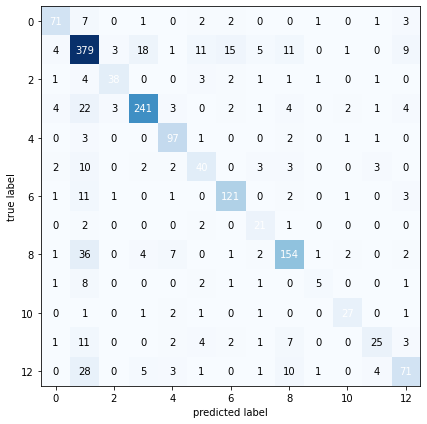

In [ ]:
y_pred = AutoMLmodel.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [ ]:
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))
print ('Recall:', recall_score(y_test, y_pred,
                              average='weighted'))
print ('Precision:', precision_score(y_test, y_pred,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, y_pred))

plt.show()

Accuracy: 0.7752403846153846
F1 score: 0.7718898991119425
Recall: 0.7752403846153846
Precision: 0.7767098341276344

 clasification report:
                                                            precision    recall  f1-score   support

Auditoria del sistema / interrupción completa de servicio       0.83      0.81      0.82        88
               Cambiar datos por BD, Cambiar estado de OT       0.73      0.83      0.77       457
                   Capacitación de módulo o funcionalidad       0.84      0.73      0.78        52
                Carga de datos masiva, gestión de tickets       0.89      0.84      0.86       287
                                        Configuración GPS       0.82      0.92      0.87       105
                                   Configuración de visor       0.60      0.62      0.61        65
                       Creación / inactivación de usuario       0.83      0.86      0.84       141
         Creación de servicios / publicación de servicios       0.5

## AUTO SKLEARN WITH DATA BALANCING THROUGH SMOTE 

In [ ]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 2.9MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train) 

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (8319,)
Shape of X after SMOTE: (23088, 3637)

Balance of positive and negative classes (%):


Creación / inactivación de usuario                           7.692308
Revisión de formularios                                      7.692308
Informes de reporte y mantenimiento                          7.692308
No envia el backup de app móvil / no cargan datos en app     7.692308
Disminución de desempeño de plataforma                       7.692308
Datos erróneos en reporte / actualización de reportes        7.692308
Creación de servicios / publicación de servicios             7.692308
Configuración de visor                                       7.692308
Capacitación de módulo o funcionalidad                       7.692308
Cambiar datos por BD, Cambiar estado de OT                   7.692308
Auditoria del sistema / interrupción completa de servicio    7.692308
Configuración GPS                                            7.692308
Carga de datos masiva, gestión de tickets                    7.692308
Name: categoria, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [ ]:
AutoMLmodel = AutoSklearnClassifier(time_left_for_this_task=6*60,
                              per_run_time_limit=60,
                              include_estimators=["random_forest","libsvm_svc","mlp"]
                              #include_estimators=["mlp"]
                              )


AutoMLmodel.fit(X_train, y_train)

print(AutoMLmodel.sprint_statistics())

AutoMLmodel.score(X_test,y_test)

[WARNING] [2021-06-01 17:36:55,815:Client-AutoMLSMBO(1)::f3534dec-c2ff-11eb-8202-0242ac1c0002] Configuration 86 not found
[WARNING] [2021-06-01 17:36:55,817:Client-AutoMLSMBO(1)::f3534dec-c2ff-11eb-8202-0242ac1c0002] Configuration 446 not found
[WARNING] [2021-06-01 17:36:55,818:Client-AutoMLSMBO(1)::f3534dec-c2ff-11eb-8202-0242ac1c0002] Configuration 484 not found
[WARNING] [2021-06-01 17:36:55,819:Client-AutoMLSMBO(1)::f3534dec-c2ff-11eb-8202-0242ac1c0002] Configuration 556 not found
[WARNING] [2021-06-01 17:36:55,819:Client-AutoMLSMBO(1)::f3534dec-c2ff-11eb-8202-0242ac1c0002] Configuration 135 not found
[WARNING] [2021-06-01 17:36:55,819:Client-AutoMLSMBO(1)::f3534dec-c2ff-11eb-8202-0242ac1c0002] Configuration 482 not found
[WARNING] [2021-06-01 17:36:55,823:Client-AutoMLSMBO(1)::f3534dec-c2ff-11eb-8202-0242ac1c0002] Configuration 467 not found
[WARNING] [2021-06-01 17:36:55,819:Client-AutoMLSMBO(1)::f3534dec-c2ff-11eb-8202-0242ac1c0002] Configuration 376 not found
[WARNING] [2021-0

0.9558250324815938

In [ ]:
print(AutoMLmodel.show_models())

[(0.600000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_tran

In [ ]:
AutoMLmodel.cv_results_['params'][np.argmax(AutoMLmodel.cv_results_['mean_test_score'])]

{'balancing:strategy': 'weighting',
 'classifier:__choice__': 'libsvm_svc',
 'classifier:libsvm_svc:C': 9267.888846004707,
 'classifier:libsvm_svc:coef0': 0.0319322767663095,
 'classifier:libsvm_svc:degree': 4,
 'classifier:libsvm_svc:gamma': 0.22139016521918667,
 'classifier:libsvm_svc:kernel': 'poly',
 'classifier:libsvm_svc:max_iter': -1,
 'classifier:libsvm_svc:shrinking': 'True',
 'classifier:libsvm_svc:tol': 4.882072393715862e-05,
 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding',
 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer',
 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.007361476370837449,
 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent',
 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize',
 'feature_preprocessor:__choice__': 'no_preprocessing'}

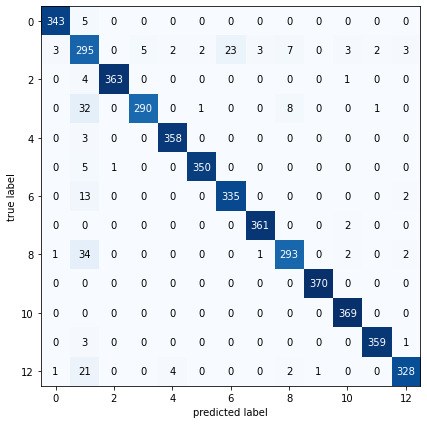

In [ ]:
y_pred = AutoMLmodel.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [ ]:
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))
print ('Recall:', recall_score(y_test, y_pred,
                              average='weighted'))
print ('Precision:', precision_score(y_test, y_pred,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, y_pred))

plt.show()

Accuracy: 0.9558250324815938
F1 score: 0.9568804084906628
Recall: 0.9558250324815938
Precision: 0.9596574500831216

 clasification report:
                                                            precision    recall  f1-score   support

Auditoria del sistema / interrupción completa de servicio       0.99      0.99      0.99       348
               Cambiar datos por BD, Cambiar estado de OT       0.71      0.85      0.77       348
                   Capacitación de módulo o funcionalidad       1.00      0.99      0.99       368
                Carga de datos masiva, gestión de tickets       0.98      0.87      0.93       332
                                        Configuración GPS       0.98      0.99      0.99       361
                                   Configuración de visor       0.99      0.98      0.99       356
                       Creación / inactivación de usuario       0.94      0.96      0.95       350
         Creación de servicios / publicación de servicios       0.9